# LAB: Principal Components Analysis (PCA)


##  Introducción

El objetivo de este LAB es utilizar PCA como herramienta para mejorar la performance en el contexto del aprendizaje supervisado.  <br />
El dataset que vamos a utilizar es vehicle.csv del repositorio de la UCI. Para más información sobre este dataset se puede consultar <a href='https://archive.ics.uci.edu/ml/datasets/Statlog+(Vehicle+Silhouettes)'> aquí </a>.

Comiencen evaluando un ensamble de árboles como RandomForest() con los parámetros por default para tener un benchmark sobre el cual mejorar. Luego hagan un GridSearch o RandomSearch evaluando distintos parámetros para los modelos combinados con distintas reducciones de la dimensionalidad. 

In [1]:
import pandas as pd
df = pd.read_csv('../Data/vehicle.csv')

In [2]:
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null int64
distance_circularity           846 non-null int64
radius_ratio                   846 non-null int64
pr.axis_aspect_ratio           846 non-null int64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null int64
elongatedness                  846 non-null int64
pr.axis_rectangularity         846 non-null int64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null int64
scaled_variance.1              846 non-null int64
scaled_radius_of_gyration      846 non-null int64
scaled_radius_of_gyration.1    846 non-null int64
skewness_about                 846 non-null int64
skewness_about.1               846 non-null int64
skewness_about.2               846 non-null int64
hollows_ratio                  846 non-null i

In [11]:
%matplotlib inline
import seaborn as sns

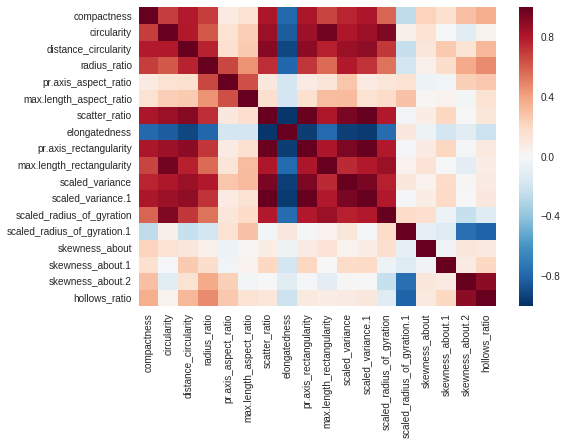

In [5]:
sns.heatmap(df.corr())

In [16]:
df.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

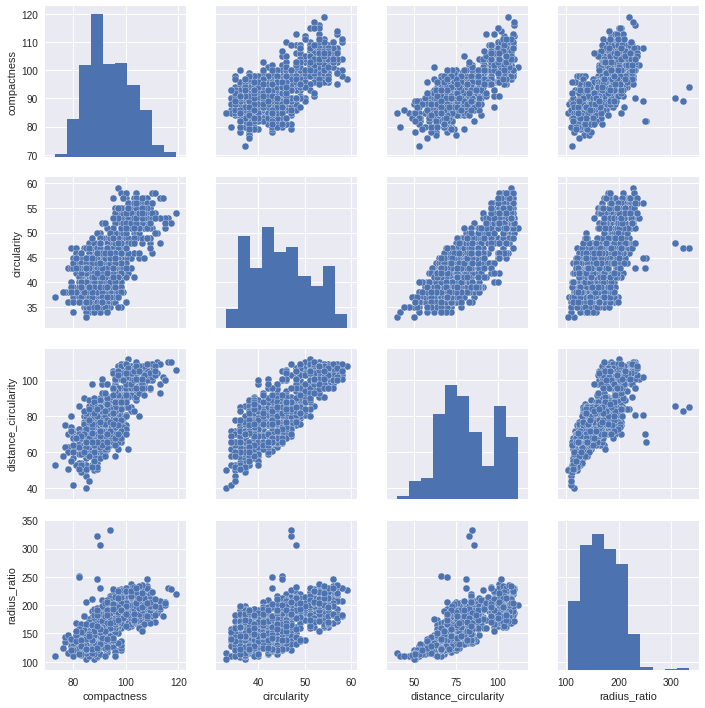

In [17]:
sns.pairplot(df[['compactness', 'circularity', 'distance_circularity', 'radius_ratio']])

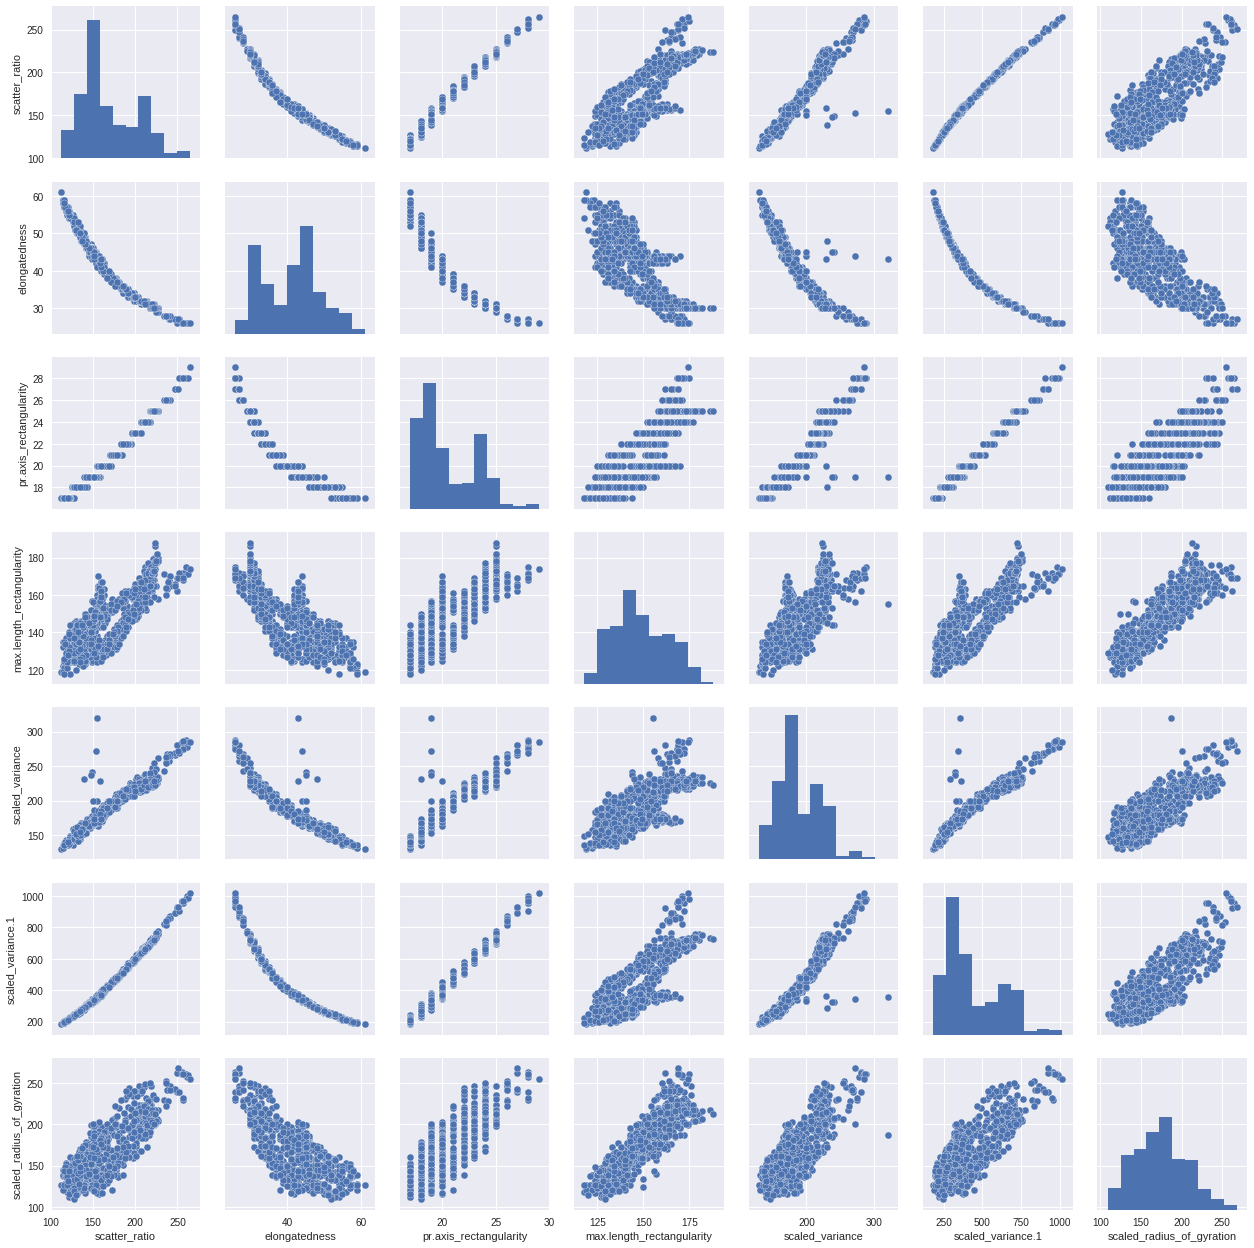

In [18]:
sns.pairplot(df[['scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration']])

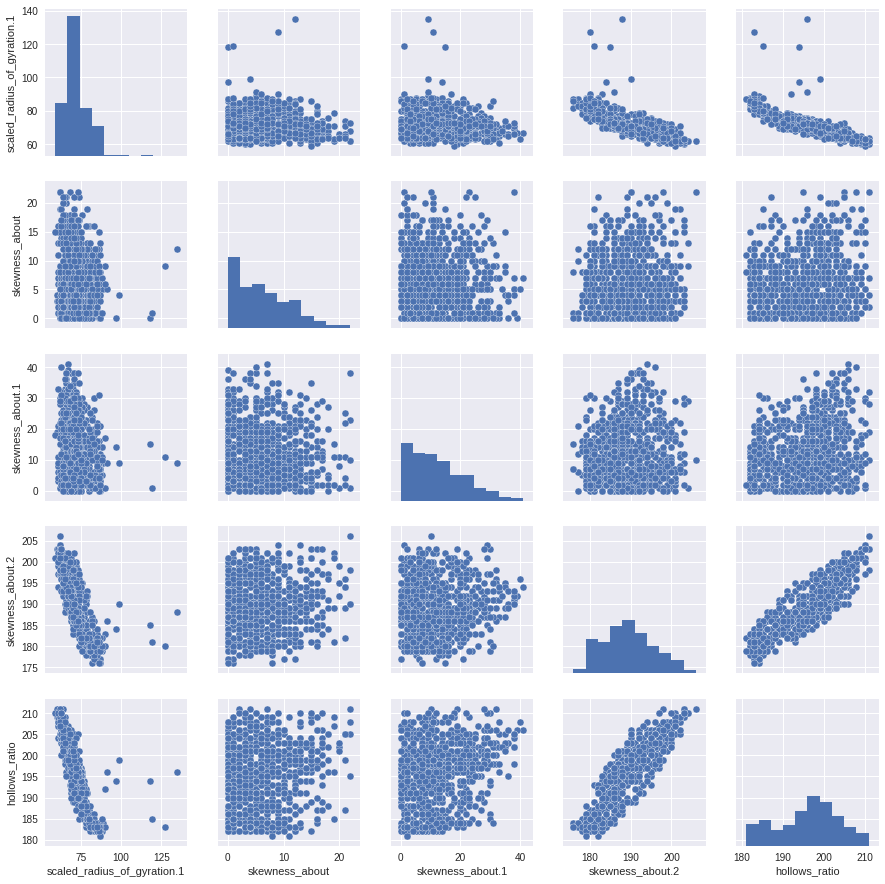

In [20]:
sns.pairplot(df[['scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']])

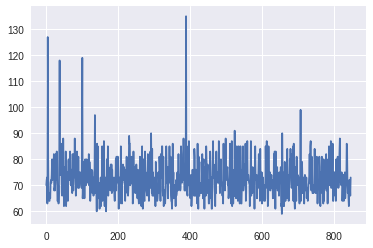

In [12]:
import matplotlib.pyplot as plt
plt.plot(df[['scaled_radius_of_gyration.1']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4ddce7fac8>]], dtype=object)

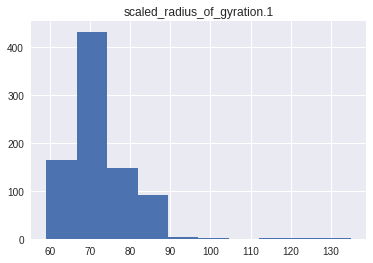

In [24]:
df[['scaled_radius_of_gyration.1']].hist()

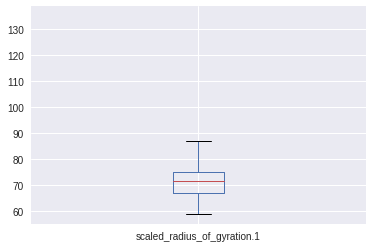

In [25]:
df[['scaled_radius_of_gyration.1']].boxplot()

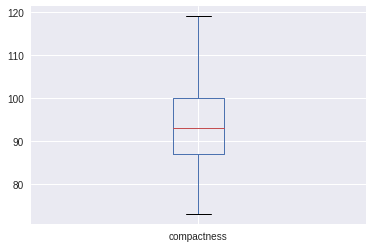

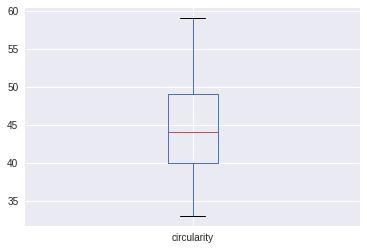

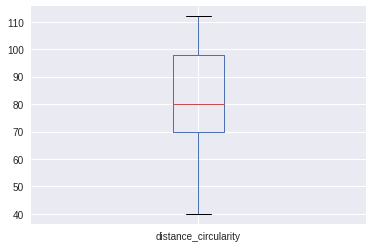

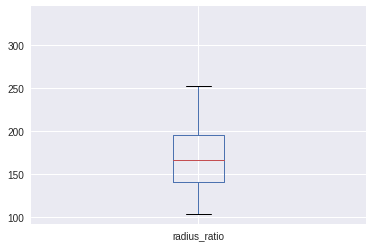

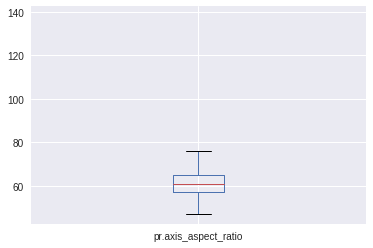

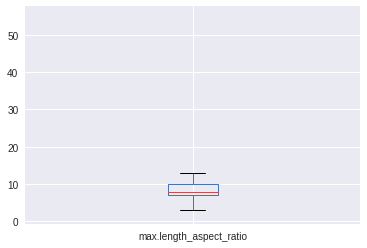

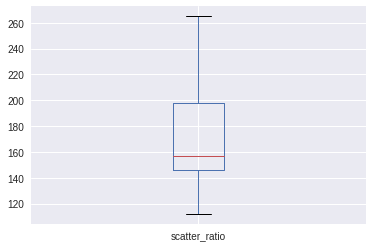

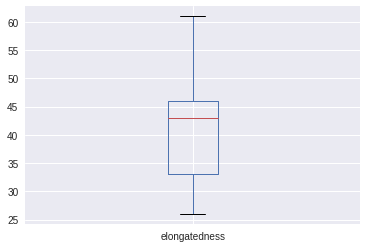

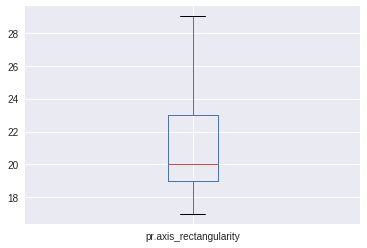

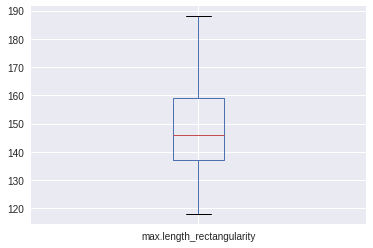

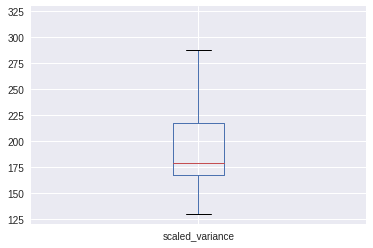

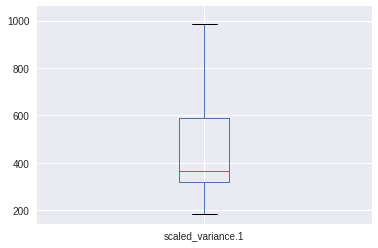

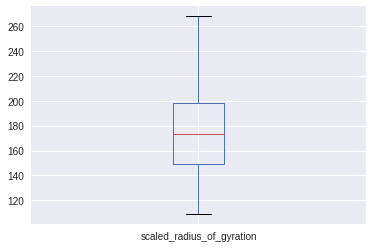

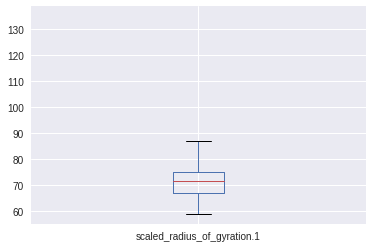

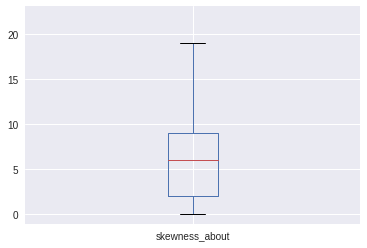

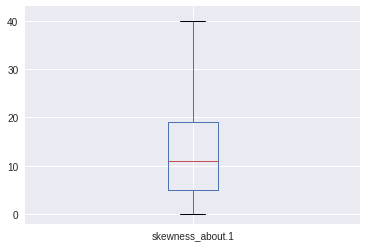

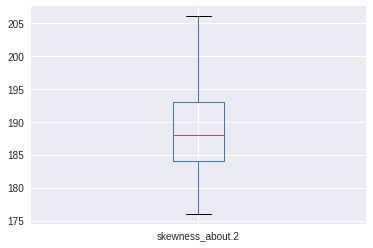

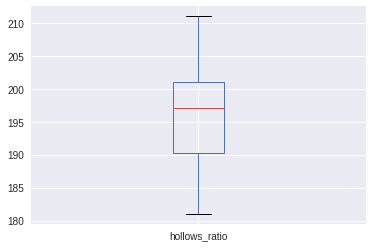

IndexError: list index out of range

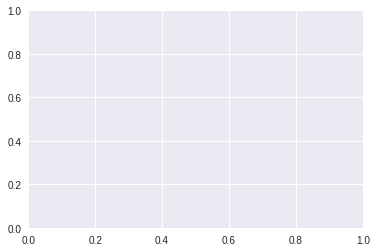

In [27]:
for col in df.columns:
    df[[col]].boxplot()
    plt.show()

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import numpy as np

In [58]:
X = df[df.columns.values.tolist()[:-1]]
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [56]:
base_classifier = GradientBoostingClassifier(random_state=42)
base_classifier.fit(X_train, y_train)
y_base_prediction = base_classifier.predict(X_test)
print('base accuracy:', accuracy_score(y_test, y_base_prediction))

cross_val_score(base_classifier, X, y).mean()

base accuracy: 0.801886792453


0.77064407722933348

In [59]:
scl = StandardScaler()
pca = PCA()
gbc = GradientBoostingClassifier(random_state=42)
model = make_pipeline(scl,pca, gbc)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('tunning accuracy', accuracy_score(y_test, y_pred))

cross_val_score(model, X, y).mean()

tunning accuracy 0.77358490566


0.76958738245073277

In [120]:
cross_val_score?

Object `cross_val_score` not found.


In [105]:
confusion_matrix(y_test, y_pred)

array([[59,  4,  0,  2],
       [ 0, 26, 10,  3],
       [ 1, 21, 33,  4],
       [ 0,  0,  1, 48]])

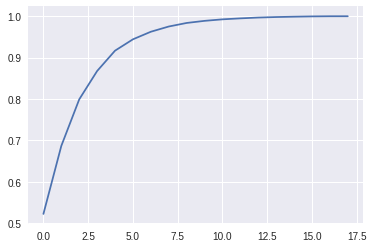

In [101]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [60]:
mini_df = df[['scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration']]

In [61]:
pca = PCA(n_components=3)
pca.fit(mini_df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

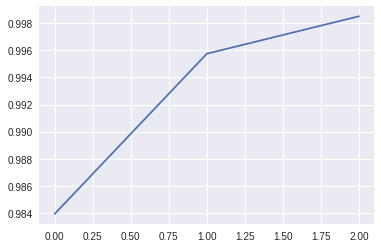

In [62]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [63]:
X_mini_pca = pd.DataFrame(pca.transform(mini_df))

In [64]:
X_mini_pca

,0,1,2
0,-59.579907,-21.584007,-5.180334
1,-114.620434,-0.346687,-0.465990
2,206.554975,-14.456147,2.186328
3,-141.688642,25.675703,-7.306316
4,-103.558836,-31.895550,68.568676
5,539.760202,-7.916025,6.070223
6,-81.154175,-8.612230,0.906394
7,-164.041628,-14.737165,-1.525977
8,-234.499814,30.826063,-9.674914
9,63.839937,32.306108,3.467496


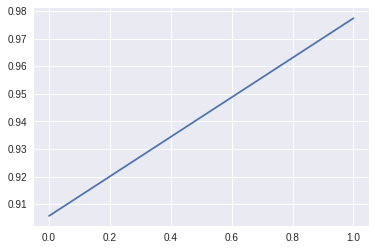

In [65]:
mini_df_2 = df[['compactness', 'circularity', 'distance_circularity', 'radius_ratio']]
pca = PCA(n_components=2)
pca.fit(mini_df_2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))      
X_mini_pca2 = pd.DataFrame(pca.transform(mini_df_2))

In [66]:
mini_df_3 = df[[
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']]

In [67]:
new_df = pd.concat([X_mini_pca, X_mini_pca2, mini_df_3], axis=1)

In [68]:
new_df.head()

,0,1,2,0,1,pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-59.579907,-21.584007,-5.180334,9.148870,1.714947,72,10,70,6,16,187,197
1,-114.620434,-0.346687,-0.465990,-25.581980,-11.195775,57,9,72,9,14,189,199
2,206.554975,-14.456147,2.186328,47.446252,-7.165946,66,10,73,14,9,188,196
3,-141.688642,25.675703,-7.306316,-9.625058,-2.739110,63,9,63,6,10,199,207
4,-103.558836,-31.895550,68.568676,26.770785,27.789747,103,52,127,9,11,180,183


In [69]:
len(df.columns)

19

In [70]:
len(new_df.columns)

12

In [71]:
X = new_df
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

base_classifier = GradientBoostingClassifier(random_state=42)
base_classifier.fit(X_train, y_train)
y_base_prediction = base_classifier.predict(X_test)
print('base accuracy:', accuracy_score(y_test, y_base_prediction))

cross_val_score(base_classifier, X, y).mean()

base accuracy: 0.754716981132


0.73987673083417771